# Produisez une étude de marché

# Scénario
Votre entreprise **d'agroalimentaire** souhaite se développer à l'international. Elle est spécialisée dans...
 le poulet !

L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

Votre objectif sera d'aider **à cibler plus particulièrement certains pays**, dans le but d'approfondir ensuite l'étude de marché. Plus particulièrement, l'idéal serait de produire des "groupes" de pays, plus ou moins gros, dont on connaît les caractéristiques.

Dans un premier temps, la stratégie est plutôt d'exporter les produits plutôt que de produire sur place, c'est-à-dire dans le(s) nouveau(x) pays ciblé(s).


Pour identifier les pays propices à une insertion dans le marché du poulet,
 Il vous a été demandé de cibler les pays. 
 Etudier les régimes alimentaires de chaque pays, notamment en termes de protéines d'origine animale et en termes de calories.


Construisez votre échantillon contenant l'ensemble des pays disponibles, chacun caractérisé par ces variables :

différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage ;
proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays ;
disponibilité alimentaire en protéines par habitant ;
disponibilité alimentaire en calories par habitant.

Construisez un dendrogramme contenant l'ensemble des pays étudiés, puis coupez-le afin d'obtenir 5 groupes.

Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

Donnez une courte liste de pays à cibler, en présentant leurs caractéristiques. Un découpage plus précis qu'en 5 groupes peut si besoin être effectué pour cibler un nombre raisonnable de pays. 

Visualisez vos  partitions dans le premier plan factoriel obtenu par ACP.

Dans votre partition, vous avez obtenu des groupes distincts. Vérifiez donc qu'ils diffèrent réellement. Pour cela, réalisez les tests statistiques suivants :

un test d'adéquation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, trouvez une variable dont la loi est normale ;
un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez déterminé. Sur ces 2 clusters, testez la variable gaussienne grâce à un test de comparaison.

In [46]:
# Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import sklearn as sk
import scipy as sp
import pca as pca






In [47]:
#Versions utilisées
print("Jupyter Notebook : " + str(pd.__version__))
print("Pandas : " + str(pd.__version__))
print("Numpy : " + str(np.__version__))
print("Seaborn : " + str(sns.__version__))

Jupyter Notebook : 1.2.4
Pandas : 1.2.4
Numpy : 1.20.1
Seaborn : 0.11.1


In [48]:
sns.set( # Styles Seaborn
    style='whitegrid',
    context='notebook',
    palette='Paired',
    rc={'figure.figsize':(8,5)})

In [49]:
# Couleurs
red_a400 = '#ff1744'
indigo_a100 = '#8c9eff'
indigo_a400 = '#3d5afe'
indigo_a700 = '#304ffe'
bluegrey_900 = '#263238'
teal_a400 = '#1de9b6'
purple_a400 = '#d500f9'
yellow_a400 = '#ffea00'
bluegrey_900 = '#263238'
palette_5 = [teal_a400, indigo_a400, red_a400, yellow_a400, purple_a400]

# 1. Import des données

## 1.1 Import et traitement de la population par pays
la variation de la population entre 2013 et 2019, en %, qui sera positive en cas de croissance ou négative en cas de baisse démographique ;

Sources FAO (http://www.fao.org/faostat/fr/#data)

In [50]:
df_population = pd.read_csv('datas/fao-populations_2019- 2013.csv' , header=0, sep=",", decimal=".")
df_population.head(5)

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,32269.589,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2019,2019,1000 personnes,38041.754,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,53687.121,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2019,2019,1000 personnes,58558.270,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,2903.790,X,Sources internationales sûres,NaN


In [51]:
df_population = df_population[['Code zone (FAO)', 'Zone', 'Produit', 'Année', 'Valeur']]
df_population['Valeur'] = df_population['Valeur']*1000
df_population.head()

,Code zone (FAO),Zone,Produit,Année,Valeur
0,2,Afghanistan,Population-Estimations,2013,32269589.0
1,2,Afghanistan,Population-Estimations,2019,38041754.0
2,202,Afrique du Sud,Population-Estimations,2013,53687121.0
3,202,Afrique du Sud,Population-Estimations,2019,58558270.0
4,3,Albanie,Population-Estimations,2013,2903790.0


In [52]:
df_population = df_population.pivot_table(index=['Code zone (FAO)', 'Zone'], columns='Année', values = 'Valeur', aggfunc = sum).reset_index()
df_population.head()

Année,Code zone (FAO),Zone,2013,2019
0,1,Arménie,2897588.0,2957731.0
1,2,Afghanistan,32269589.0,38041754.0
2,3,Albanie,2903790.0,2880917.0
3,4,Algérie,38140133.0,43053054.0
4,5,Samoa américaines,55713.0,55312.0


In [53]:
# différence de population entre 2013 et 2019, exprimée en pourcentage
df_population['Evolution population (%)'] = round(((df_population[2019]-df_population[2013])/df_population[2013])*100,3)


In [54]:
population2013 = df_population[2013].sum()
population2019 = df_population[2019].sum()
evolution_globale = round(((population2019 - population2013) / population2013)*100,3)
print('Pour indication, la population totale en 2013 était de', population2013, 'et de', population2019, 'en 2019.\nL\'évolution 2013/2019 est de', evolution_globale, '%.')


Pour indication, la population totale en 2013 était de 8633816910.0 et de 9179381901.0 en 2019.
L'évolution 2013/2019 est de 6.319 %.


In [55]:
df_population= df_population.rename(columns= {2019: 'population', 'Code zone (FAO)':'Code zone'})
df_population= df_population[['Code zone', 'Zone' , 'population' ,'Evolution population (%)']]
df_population.head(2)


Année,Code zone,Zone,population,Evolution population (%)
0,1,Arménie,2957731.0,2.076
1,2,Afghanistan,38041754.0,17.887


## 1.2 Données sur les bilans alimentaires mondiaux (2019)


le ratio entre la quantité de protéines d’origine animale et la quantité totale de protéines consommées ;

Sources FAO (http://www.fao.org/faostat/fr/#data)


In [56]:
df_dispo_alimentaire = pd.read_csv('datas/FAOSTAT_data.csv', header=0, sep=",", decimal=".")
df_dispo_alimentaire.head(4)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2901,Total General,2019,2019,Kcal/personne/jour,2273.00,Fc,Donnée calculée
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2901,Total General,2019,2019,g/personne/jour,57.31,Fc,Donnée calculée
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,684,Disponibilité de matière grasse en quantité (g...,2901,Total General,2019,2019,g/personne/jour,39.78,Fc,Donnée calculée
3,FBS,Bilans Alimentaires (2010-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2019,2019,Kcal/personne/jour,187.00,Fc,Donnée calculée


In [57]:
df_dispo_alimentaire = df_dispo_alimentaire.pivot_table(index=['Code zone', 'Zone', 'Année'],
                                columns=['Élément', 'Produit'],
                                values = 'Valeur',
                                aggfunc=sum).reset_index()
df_dispo_alimentaire.head()

Élément Code zone         Zone Année  \
Produit                                
0               1      Arménie  2019   
1               2  Afghanistan  2019   
2               3      Albanie  2019   
3               4      Algérie  2019   
4               7       Angola  2019   

Élément Disponibilité alimentaire (Kcal/personne/jour)                \
Produit                               Produits Animaux Total General   
0                                                975.0        3022.0   
1                                                187.0        2273.0   
2                                               1021.0        3338.0   
3                                                379.0        3493.0   
4                                                211.0        2445.0   

Élément Disponibilité de matière grasse en quantité (g/personne/jour)  \
Produit                                              Produits Animaux   
0                                                    74.06              
1                                                    12.67              
2                                                    70.01              
3                                                    22.14              
4                                                    15.27              

Élément                \
Produit Total General   
0              115.83   
1               39.78   
2              115.99   
3               98.14   
4               59.42   

Élément Disponibilité de protéines en quantité (g/personne/jour)                
Produit                                         Produits Animaux Total General  
0                                                    52.86               94.29  
1                                                    10.34               57.31  
2                                                    62.47              116.02  
3                                                    24.09               90.84  
4                                                    15.54               52.09

In [58]:
# proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays
df_dispo_alimentaire["ratio_proteines_animales"] = round((df_dispo_alimentaire[('Disponibilité de protéines en quantité (g/personne/jour)', 'Produits Animaux')]
                                                                         /df_dispo_alimentaire[('Disponibilité de protéines en quantité (g/personne/jour)', 'Total General')])*100,3)
df_dispo_alimentaire.head()

Élément Code zone         Zone Année  \
Produit                                
0               1      Arménie  2019   
1               2  Afghanistan  2019   
2               3      Albanie  2019   
3               4      Algérie  2019   
4               7       Angola  2019   

Élément Disponibilité alimentaire (Kcal/personne/jour)                \
Produit                               Produits Animaux Total General   
0                                                975.0        3022.0   
1                                                187.0        2273.0   
2                                               1021.0        3338.0   
3                                                379.0        3493.0   
4                                                211.0        2445.0   

Élément Disponibilité de matière grasse en quantité (g/personne/jour)  \
Produit                                              Produits Animaux   
0                                                    74.06              
1                                                    12.67              
2                                                    70.01              
3                                                    22.14              
4                                                    15.27              

Élément                \
Produit Total General   
0              115.83   
1               39.78   
2              115.99   
3               98.14   
4               59.42   

Élément Disponibilité de protéines en quantité (g/personne/jour)  \
Produit                                         Produits Animaux   
0                                                    52.86         
1                                                    10.34         
2                                                    62.47         
3                                                    24.09         
4                                                    15.54         

Élément               ratio_proteines_animales  
Produit Total General                           
0               94.29                   56.061  
1               57.31                   18.042  
2              116.02                   53.844  
3               90.84                   26.519  
4               52.09                   29.833

## 1.3 Construction et sauvegarde du dataframe principal


In [65]:
df_dataset_fao = pd.merge(df_population, df_dispo_alimentaire, on="Code zone")

df_dataset_fao = df_dataset_fao[["Code zone","Zone", ('Année', ''), 'population','Evolution population (%)',
                                             ('Disponibilité alimentaire (Kcal/personne/jour)', 'Total General'),
                                             ('Disponibilité de protéines en quantité (g/personne/jour)', 'Total General'),
                                             ('ratio_proteines_animales', '')]]
df_dataset_fao.rename(columns={('Année', ''):'Année', 
                              ('Disponibilité alimentaire (Kcal/personne/jour)', 'Total General'):'dispo_calories',
                              ('Disponibilité de protéines en quantité (g/personne/jour)', 'Total General'):'dispo_proteines',  ('ratio_proteines_animales', ''):'ratio_proteines_animales'},
                     inplace=True)

df_dataset_fao["dispo_calories"] *= 365
df_dataset_fao["dispo_proteines"] *= 365

df_dataset_fao.head()

/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/Users/rowaidakanaan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,Code zone,Zone,Année,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales
0,1,Arménie,2019,2957731.0,2.076,1103030.0,34415.85,56.061
1,2,Afghanistan,2019,38041754.0,17.887,829645.0,20918.15,18.042
2,3,Albanie,2019,2880917.0,-0.788,1218370.0,42347.30,53.844
3,4,Algérie,2019,43053054.0,12.881,1274945.0,33156.60,26.519
4,7,Angola,2019,31825295.0,22.331,892425.0,19012.85,29.833


# 2.Enrichissement du fichier de données

## 2.1  les valeurs de PIB par habitant,
en $ paritaire, c’est à dire normalisé en fonction du coût de la vie.


In [70]:
# Dataframes des données complémentaires
# Indicateurs Macro (PIB et croissance)
df_indicateurs_macro = pd.read_csv('datas/indicateurs_macro.csv', header=0, sep=',', decimal='.')

df_indicateurs_macro.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2019,2019,millions,17876.546427,X,Sources internationales sûres,NaN
1,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,469.919090,X,Sources internationales sûres,NaN
2,MK,Indicateurs macro,2,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2019,2019,%,-0.613895,Fc,Donnée calculée,NaN
3,MK,Indicateurs macro,202,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2019,2019,millions,351430.991183,X,Sources internationales sûres,NaN
4,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2019,2019,US$,6001.389576,X,Sources internationales sûres,NaN


In [71]:
df_indicateurs_macro = df_indicateurs_macro[['Code zone (FAO)','Élément','Valeur','Produit']]
                             
df_indicateurs_macro.head() 

,Code zone (FAO),Élément,Valeur,Produit
0,2,Valeur US $,17876.546427,Produit Intérieur Brut
1,2,Valeur US $ par habitant,469.919090,Produit Intérieur Brut
2,2,Croissance annuelle US$,-0.613895,Produit Intérieur Brut
3,202,Valeur US $,351430.991183,Produit Intérieur Brut
4,202,Valeur US $ par habitant,6001.389576,Produit Intérieur Brut


In [72]:
df_indicateurs_macro = df_indicateurs_macro.pivot_table(index=['Code zone (FAO)'], columns='Élément', values='Valeur', aggfunc=sum).reset_index()
df_indicateurs_macro.head() 

Élément,Code zone (FAO),Croissance annuelle US$,Valeur US $,Valeur US $ par habitant
0,1,9.751697,13672.801339,4622.733216
1,2,-0.613895,17876.546427,469.919090
2,3,0.865170,15278.072762,5303.197823
3,4,-2.426895,171157.863119,3975.510381
4,6,-1.997315,3154.137481,40887.421647


In [73]:
df_indicateurs_macro = df_indicateurs_macro.rename(columns={"Croissance annuelle US$":"Croissance annuelle PIB US$ (%)",
                                    "Valeur US $":"PIB Total US$ (Millions)",'Code zone (FAO)':'Code zone', 'Valeur US $ par habitant': 'PIB par habitant','Valeur US $ par habitant':'PIB par habitant'})
df_indicateurs_macro.head() 

Élément,Code zone,Croissance annuelle PIB US$ (%),PIB Total US$ (Millions),PIB par habitant
0,1,9.751697,13672.801339,4622.733216
1,2,-0.613895,17876.546427,469.919090
2,3,0.865170,15278.072762,5303.197823
3,4,-2.426895,171157.863119,3975.510381
4,6,-1.997315,3154.137481,40887.421647


## 2.2 Le taux de dépendance aux importations, 
défini en économie comme le rapport entre les importations et la disponibilité intérieure du pays ;

In [74]:
df_dépendance_importations = pd.read_csv('datas/la viande de volailles.csv', header=0, sep=",", decimal=".")
df_dépendance_importations.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5511,Production,2734,Viande de Volailles,2019,2019,Milliers de tonnes,28,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2019,2019,Milliers de tonnes,44,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2019,2019,Milliers de tonnes,67,S,Données standardisées
3,FBS,Bilans Alimentaires (2010-),202,Afrique du Sud,5511,Production,2734,Viande de Volailles,2019,2019,Milliers de tonnes,1816,Im,Données de la FAO basées sur une méthodologie ...
4,FBS,Bilans Alimentaires (2010-),202,Afrique du Sud,5611,Importations - Quantité,2734,Viande de Volailles,2019,2019,Milliers de tonnes,488,Im,Données de la FAO basées sur une méthodologie ...


In [75]:
#df_dépendance_importations['Valeur'] = df_dépendance_importations['Valeur']*1000000




In [76]:
df_dépendance_importations = df_dépendance_importations.pivot_table(index=['Code zone', 'Zone', 'Année'],
                                columns=['Élément'],
                                values = 'Valeur',
                                aggfunc=sum).reset_index()
df_dépendance_importations

Élément,Code zone,Zone,Année,Disponibilité intérieure,Importations - Quantité,Production
0,1,Arménie,2019,55.0,43.0,12.0
1,2,Afghanistan,2019,67.0,44.0,28.0
2,3,Albanie,2019,34.0,22.0,12.0
3,4,Algérie,2019,287.0,0.0,291.0
4,7,Angola,2019,327.0,278.0,49.0
...,...,...,...,...,...,...
174,256,Luxembourg,2019,12.0,12.0,0.0
175,272,Serbie,2019,112.0,17.0,104.0
176,273,Monténégro,2019,10.0,7.0,4.0
177,276,Soudan,2019,56.0,0.0,75.0


Au cours de l'analyse de la situation alimentaire d'un pays, il importe de bien savoir quelle part les approvisionnements intérieurs disponibles provient des importations et quelle part provient de la production du pays lui-même. Le TDI répond à cette question. Il se définit ainsi:

In [77]:
#le taux de dépendance aux importations, défini en économie comme le rapport entre les importations et la disponibilité intérieure du pays ;

df_dépendance_importations['taux_dépendance_importations']=df_dépendance_importations['Importations - Quantité']    / df_dépendance_importations['Disponibilité intérieure']*100
df_dépendance_importations.head(2)

Élément,Code zone,Zone,Année,Disponibilité intérieure,Importations - Quantité,Production,taux_dépendance_importations
0,1,Arménie,2019,55.0,43.0,12.0,78.181818
1,2,Afghanistan,2019,67.0,44.0,28.0,65.671642


In [78]:
df_dépendance_importations = df_dépendance_importations[['Code zone', 'Disponibilité intérieure','Importations - Quantité', 'Production','taux_dépendance_importations']]

In [83]:
df = pd.merge(df_dispo_alimentaire_etendu, df_indicateurs_macro, on="Code zone")
df.head(2)

,Code zone,Zone,Année,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,Croissance annuelle PIB US$ (%),PIB Total US$ (Millions),PIB par habitant
0,1,Arménie,2019,2957731.0,2.076,3022.0,94.29,56.061,9.751697,13672.801339,4622.733216
1,2,Afghanistan,2019,38041754.0,17.887,2273.0,57.31,18.042,-0.613895,17876.546427,469.919090


In [84]:
df = pd.merge(df, df_dépendance_importations, on="Code zone")

df.head(2)

,Code zone,Zone,Année,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,Croissance annuelle PIB US$ (%),PIB Total US$ (Millions),PIB par habitant,Disponibilité intérieure,Importations - Quantité,Production,taux_dépendance_importations
0,1,Arménie,2019,2957731.0,2.076,3022.0,94.29,56.061,9.751697,13672.801339,4622.733216,55.0,43.0,12.0,78.181818
1,2,Afghanistan,2019,38041754.0,17.887,2273.0,57.31,18.042,-0.613895,17876.546427,469.919090,67.0,44.0,28.0,65.671642


In [85]:
df.head(2)

,Code zone,Zone,Année,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,Croissance annuelle PIB US$ (%),PIB Total US$ (Millions),PIB par habitant,Disponibilité intérieure,Importations - Quantité,Production,taux_dépendance_importations
0,1,Arménie,2019,2957731.0,2.076,3022.0,94.29,56.061,9.751697,13672.801339,4622.733216,55.0,43.0,12.0,78.181818
1,2,Afghanistan,2019,38041754.0,17.887,2273.0,57.31,18.042,-0.613895,17876.546427,469.919090,67.0,44.0,28.0,65.671642


In [97]:
df=df.drop('Code zone', axis=1)
df=df.drop('Année', axis=1)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Zone                             178 non-null    object 
 1   population                       178 non-null    float64
 2   Evolution population (%)         178 non-null    float64
 3   dispo_calories                   178 non-null    float64
 4   dispo_proteines                  178 non-null    float64
 5   ratio_proteines_animales         178 non-null    float64
 6   Croissance annuelle PIB US$ (%)  178 non-null    float64
 7   PIB Total US$ (Millions)         178 non-null    float64
 8   PIB par habitant                 178 non-null    float64
 9   Disponibilité intérieure         178 non-null    float64
 10  Importations - Quantité          177 non-null    float64
 11  Production                       176 non-null    float64
 12  taux_dépendance_import

In [99]:
#Identifier la présence de doublons
print(df.duplicated().sum())


0


In [100]:
#Trouver les valeurs manquantes
df_null=  df.loc[df.isnull().any(axis=1)]
df_null

,Zone,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,Croissance annuelle PIB US$ (%),PIB Total US$ (Millions),PIB par habitant,Disponibilité intérieure,Importations - Quantité,Production,taux_dépendance_importations
48,Djibouti,973560.0,10.219,2795.0,65.93,19.733,8.311198,3166.329057,3252.320409,3.0,3.0,NaN,100.000000
96,Maldives,530953.0,27.758,2212.0,80.01,61.430,6.436919,5642.163793,10626.484440,12.0,11.0,NaN,91.666667
165,Venezuela (République bolivarienne du),28515829.0,-4.248,2204.0,51.55,43.705,-33.839648,134960.288472,4732.820093,428.0,NaN,428.0,NaN


In [101]:
df.describe()

,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,Croissance annuelle PIB US$ (%),PIB Total US$ (Millions),PIB par habitant,Disponibilité intérieure,Importations - Quantité,Production,taux_dépendance_importations
count,1.780000e+02,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02,178.000000,178.000000,177.000000,176.000000,177.000000
mean,5.106782e+07,8.244680,2883.887640,81.599213,42.680882,1.413756,5.638667e+05,14067.468345,803.876404,94.892655,862.022727,44.214572
std,1.863837e+08,7.571477,457.500392,20.992279,16.098433,7.611731,2.280861e+06,19779.110886,2760.835701,224.221798,3026.033513,50.192418
min,5.282300e+04,-12.812000,1707.000000,25.910000,7.082000,-33.839648,1.948667e+02,260.381563,2.000000,0.000000,0.000000,0.000000
25%,2.789950e+06,2.977750,2572.750000,65.327500,28.918750,-2.011140,1.242825e+04,1863.037073,32.500000,4.000000,11.750000,4.152047
50%,9.891248e+06,7.144000,2879.000000,81.155000,43.872000,1.048515,4.269907e+04,6047.268633,110.500000,19.000000,76.000000,26.865672
75%,3.191866e+07,13.760500,3292.750000,96.982500,56.142000,3.982193,2.505294e+05,16818.669192,333.000000,86.000000,351.250000,79.411765
max,1.465634e+09,32.145000,3862.000000,143.940000,74.662000,30.705103,2.143323e+07,115480.867570,21386.000000,1814.000000,22858.000000,404.026846


In [102]:
df.style.background_gradient(cmap='BrBG')


,Zone,population,Evolution population (%),dispo_calories,dispo_proteines,ratio_proteines_animales,Croissance annuelle PIB US$ (%),PIB Total US$ (Millions),PIB par habitant,Disponibilité intérieure,Importations - Quantité,Production,taux_dépendance_importations
0,Arménie,2957731.000000,2.076000,3022.000000,94.290000,56.061000,9.751697,13672.801339,4622.733216,55.000000,43.000000,12.000000,78.181818
1,Afghanistan,38041754.000000,17.887000,2273.000000,57.310000,18.042000,-0.613895,17876.546427,469.919090,67.000000,44.000000,28.000000,65.671642
2,Albanie,2880917.000000,-0.788000,3338.000000,116.020000,53.844000,0.865170,15278.072762,5303.197823,34.000000,22.000000,12.000000,64.705882
3,Algérie,43053054.000000,12.881000,3493.000000,90.840000,26.519000,-2.426895,171157.863119,3975.510381,287.000000,0.000000,291.000000,0.000000
4,Angola,31825295.000000,22.331000,2445.000000,52.090000,29.833000,-16.134268,85000.612455,2670.850732,327.000000,278.000000,49.000000,85.015291
5,Antigua-et-Barbuda,97118.000000,6.121000,2485.000000,80.800000,63.515000,3.526399,1661.962963,17112.821135,7.000000,7.000000,0.000000,100.000000
6,Argentine,44780677.000000,6.125000,3304.000000,106.950000,63.478000,-13.504900,449663.524782,10041.463303,2020.000000,5.000000,2248.000000,0.247525
7,Australie,25203198.000000,8.378000,3417.000000,107.940000,67.547000,-5.397355,1380207.832899,54763.202388,1243.000000,9.000000,1278.000000,0.724055
8,Autriche,8955102.000000,4.662000,3691.000000,108.950000,59.192000,-2.201622,445075.391688,49700.761833,177.000000,113.000000,132.000000,63.841808
9,Bahamas,389482.000000,6.077000,2626.000000,76.100000,63.640000,4.275040,13578.800000,34863.742098,22.000000,25.000000,6.000000,113.636364


# Classification hiérarchique


## Corrélations

Avant de réaliser l'ACP, on peut vérifier la corrélation des variables avec une matrice des corrélations.

Fortes corrélations entre :

la dispo. en protéines et la dispo. en calories.\
la dispo. en protéines et le ratio de protéines animales.\
la Disponibilité intérieure et le PIB.

Nous sommes intéressés par les pays les plus susceptibles de consommer du poulet, donc ceux ayant un fort ratio de protéines animales. Les corrélations montrent que ces pays sont susceptibles d'avoir un fort PIB, et de grandes disponibilités en protéines et calories.des disponibilités en protéines et calories.

<ipython-input-103-08ce70fc63ab>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(matrix, dtype=np.bool))


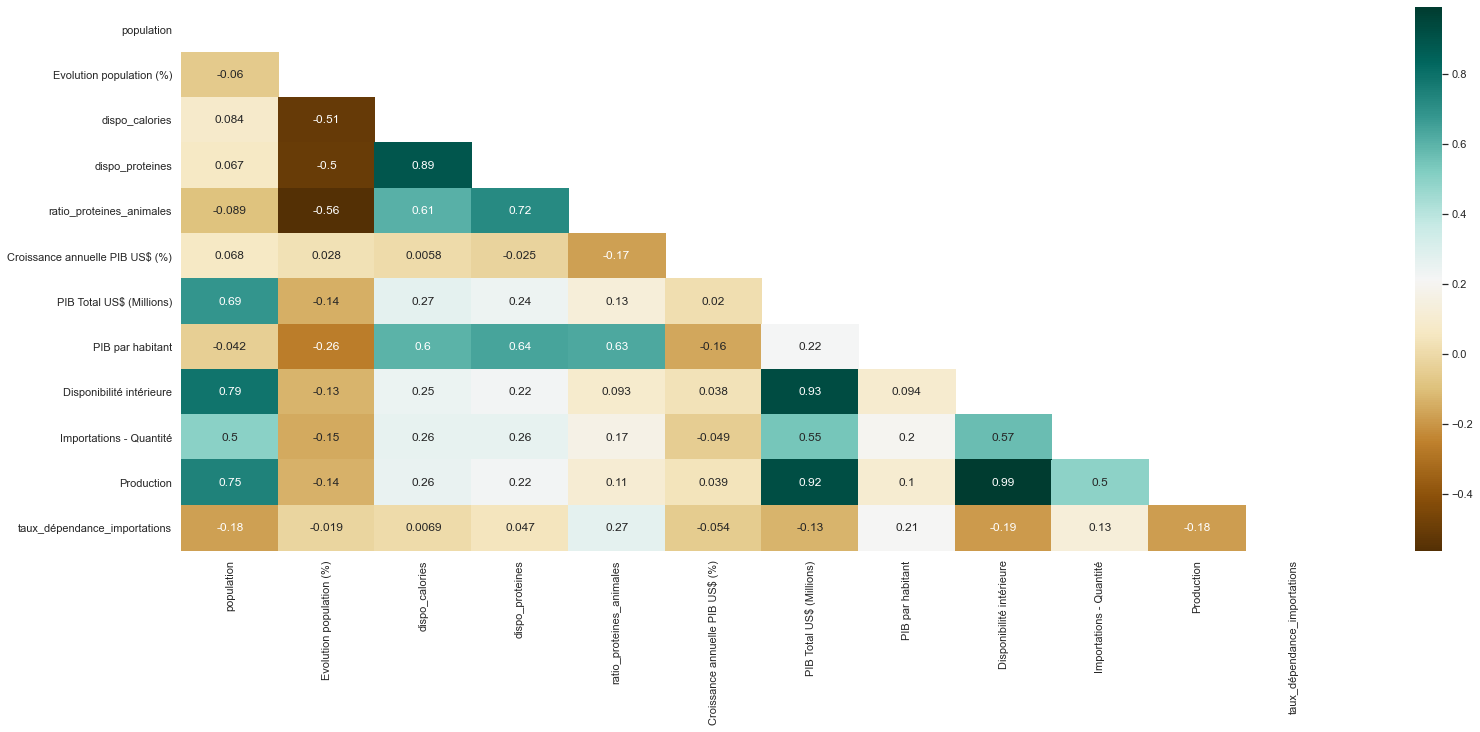

In [103]:
# Calculate pairwise-correlation
matrix = df.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=np.bool))
plt.figure(figsize=(26, 10))
sns.heatmap(matrix, mask=mask, annot=True, cmap='BrBG')
plt.show()